# Introduction to Data Analasys
## HW 3
##### Presenters:
Roi Maskalik, 212234637 <br>
Dvir Twito, 324270883

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
hw_df = pd.read_csv('HW3_Data.csv')

### Question 1
**Null hypothesis -** the communities served by the two public schools in this dataset come from a simple random sample of the Portugal population.<br>
**Alternative hypothesis -** the communities served by the two public schools in this dataset do not come from a simple random sample of the Portugal population.<br>
**Test statisic -** The probability that a citizen in Portugal which was eligible for study in public schools in 2005 had internet access at home.

We will run simulations according to the assumption of our model which is:<br>
0.81 of the population in Portugal which was eligible for study in public schools in 2005 had internet access at home. <br>
we will check if our test statistic from our observed data is consistent with the distribution of the statistic from our model.

the statistic value of out observed data is  0.7921455938697318


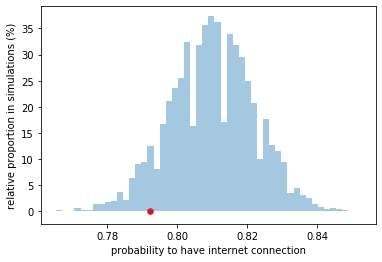

In [8]:
#first, we will calculate the statistic
question1_statistic = hw_df['internet'].apply(lambda x: 1 if x =='yes' else 0).mean()
print('the statistic value of out observed data is ', question1_statistic)

internet_status = ['has_internet', "doesn't have internet"] #possible options for having internet connection
prob_for_internet = [0.81, 0.19] # probabilities GIVEN THE MODEL IS TRUE
sample_size = hw_df.shape[0] #the size of our sample should be equal to the size of our dataset

#simulate one value of the distrubution of internet access
def prob_has_internet():
    sample_internet = np.random.choice(internet_status, p = prob_for_internet, size = sample_size)
    num_has_internet = np.count_nonzero(sample_internet == 'has_internet')
    return num_has_internet / sample_size

#run multiple simulations and return an array that contains the data of the simulations
def run_internet_simulations(num_simulations):
    many_prob_internet = np.empty(num_simulations)
    for i in range(num_simulations):
        many_prob_internet[i] = prob_has_internet()
    return many_prob_internet

num_simulations = 10000
many_prob_internet = run_internet_simulations(num_simulations)
ax = sns.distplot(many_prob_internet, kde=False, norm_hist=True)
ax.set(xlabel='probability to have internet connection', ylabel='relative proportion in simulations (%)')
plt.scatter(question1_statistic, 0, marker='o', s=30, color='red')  # draw observed value
plt.show()

In [9]:
num_simulations_like_question1_statistic_or_more_extreme = np.count_nonzero(many_prob_internet <= question1_statistic)
print('Our p-value is : ', num_simulations_like_question1_statistic_or_more_extreme/num_simulations)

Our p-value is :  0.0773


Our p-value is higher than the required significance level which is 0.05, thus we can not reject the null hypothesis.

### Question 2
**Null hypothesis -** The distribution of the reason for choosing 'Gabriel Pereira' school (excluding ’other’) is uniform.<br>
**Alternative hypothesis -** The distribution of the reason for choosing 'Gabriel Pereira' school (excluding ’other’) is not uniform, and there are more reasons which are more common then others.<br>
**Test statisic -** The number of students that chose each reason in the dataset.

In [175]:
def run_reasons_simulation(reasons, sample_size):
    simulation_reasons = np.random.choice(reasons, size = sample_size)  # Assume uniform distribution
    reasons_count = pd.Series(simulation_reasons).value_counts()
#     print(reasons_count)
    reasons_ratio = reasons_count / sample_size
    return reasons_ratio
    

In [176]:
def run_reasons_simulations(reasons, num_simulations, sample_size):
    simulations_results = np.empty((num_simulations, len(reasons)))
    for simulation in np.arange(num_simulations):
        simulations_results[simulation] = run_reasons_simulation(reasons, sample_size)
    return simulations_results

In [177]:
valid_reasons = ['home', 'reputation', 'course']
reasons_df = hw_df[(hw_df['school'] == 'GP') & (hw_df['reason'].isin(valid_reasons))]
reasons_series = reasons_df['reason']
av= run_reasons_simulations(valid_reasons, 100, reasons_series.size)
print(av)
print(av-1/3)
pd.DataFrame(av)

[[0.35654596 0.33844011 0.30501393]
 [0.35097493 0.34958217 0.2994429 ]
 [0.33844011 0.33704735 0.32451253]
 [0.36629526 0.32172702 0.31197772]
 [0.35376045 0.33286908 0.31337047]
 [0.37047354 0.31615599 0.31337047]
 [0.35654596 0.34679666 0.29665738]
 [0.33844011 0.3356546  0.32590529]
 [0.3551532  0.32590529 0.3189415 ]
 [0.34679666 0.34679666 0.30640669]
 [0.35376045 0.33983287 0.30640669]
 [0.35933148 0.33704735 0.30362117]
 [0.34818942 0.32729805 0.32451253]
 [0.34401114 0.33286908 0.32311978]
 [0.38440111 0.31615599 0.2994429 ]
 [0.33983287 0.33286908 0.32729805]
 [0.35376045 0.34122563 0.30501393]
 [0.34818942 0.32869081 0.32311978]
 [0.34122563 0.33983287 0.3189415 ]
 [0.37047354 0.33008357 0.2994429 ]
 [0.33426184 0.33286908 0.33286908]
 [0.34679666 0.33286908 0.32033426]
 [0.34679666 0.34401114 0.3091922 ]
 [0.35793872 0.32172702 0.32033426]
 [0.34261838 0.33008357 0.32729805]
 [0.35654596 0.32869081 0.31476323]
 [0.37883008 0.31058496 0.31058496]
 [0.36211699 0.3189415  0.31

,0,1,2
0,0.356546,0.338440,0.305014
1,0.350975,0.349582,0.299443
2,0.338440,0.337047,0.324513
3,0.366295,0.321727,0.311978
4,0.353760,0.332869,0.313370
...,...,...,...
95,0.360724,0.338440,0.300836
96,0.342618,0.339833,0.317549
97,0.364903,0.332869,0.302228
98,0.338440,0.337047,0.324513


### Question 3
**Null hypothesis -** there is no difference in the final grades in math courses between students who are involved in romantic relationship and those who are not.
**Alternative hypothesis -** there is a difference in the final grades in math courses between students who are involved in romantic relationship and those who are not.<br>
**Test statistic -** the difference in the final grade in math courses between between students who are involved in romantic relationship and those who are not.

We will use the bootstrap method on our dataset to estimate the difference in the final grade in math courses between students who are involved in romantic relationship and those who are not with confidence of 95%.

In [20]:
#filter the students that don't take math courses
math_students_df = hw_df[hw_df['class'] == 'Math']

#calculate the difference in the averages of the final grade in maths courses
#between students who are involved in romantic relationship and those who are not 
def differences_in_means(sample, column_name, grouping_var):
    group_by_variable = sample.groupby(grouping_var)
    means = group_by_variable[column_name].mean()
    return means[1] - means[0]

def bootstrap_difference_in_final_math_grade_means(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0]
    bootstrap_difference_means = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample.sample(original_sample_size, replace=True)
        bootstrap_difference_means[i] = differences_in_means(bootstrap_sample, column_name, grouping_var)
    return bootstrap_difference_means

bootstrap_difference_means = bootstrap_difference_in_final_math_grade_means(math_students_df, 'G3','romantic', 10000)

lower value:  -2.2453653217012004
upper value:  -0.3038295863574678


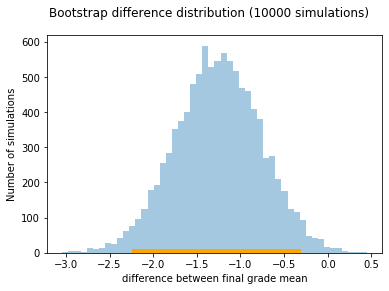

In [34]:
bootstrap_difference_means

#visualize the results
fig, axes = plt.subplots()
sns_ax = sns.distplot(bootstrap_difference_means, kde=False, ax=axes);
sns_ax.set(xlabel='difference between final grade mean', ylabel='Number of simulations');
fig.suptitle('Bootstrap difference distribution (10000 simulations)')
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=8)  # show line of values between 2.5 and 97.5 percentiles


# 95% confidence interval for the gross difference in averages of the final grade in maths courses
# between students who are involved in romantic relationship and those who are not 
left_end = np.percentile(bootstrap_difference_means, 2.5, interpolation='higher')
right_end =  np.percentile(bootstrap_difference_means, 97.5, interpolation='higher')
print(f"lower value: {left_end}")
print(f"upper value: {right_end}")

Zero is not included in the 95% CI for the difference between the means, and therefore we reject the null hypothesis and conclude at the 95% confidence level that the there is a difference between the mean final grade in math courses of students who are involved in romantic relationship and those who are not, <br>
and it lies between 0.303 and 2.245 in favor of the students who are ont invlolved in a romatic relationship.


### Question 4


In [256]:
def bootstrap_mean(original_sample, num_replications):
    '''
    Performs a given number of bootstraps on a given sample, and returns an array
    containing the mean of each bootsrap.
    '''
    original_sample_size = original_sample.size # Replicate with the same sample size
    bootstrap_means = np.empty(num_replications)
    for bootstrap in range(num_replications):
        bootstrap_sample = original_sample.sample(original_sample_size, replace=True)  # Sampling with replacement
        resampled_mean = bootstrap_sample.mean()
        bootstrap_means[bootstrap] = resampled_mean
    
    return bootstrap_means

In [257]:
# Get the final grades of the females in Portuguese course
female_portuguese_df = hw_df[(hw_df['sex'] == 'F') & (hw_df['class'] == 'Portuguese')]
female_portuguese_grades = female_portuguese_df['G3']

In [261]:
# Bootstrapping
num_replications = 10000
bootstrap_means = bootstrap_mean(female_portuguese_grades, num_replications)

In [262]:
# Create 95% confidence interval for the mean based on our sample
left_end = np.percentile(bootstrap_means, 2.5, interpolation='higher')
right_end =  np.percentile(bootstrap_means, 97.5, interpolation='higher')

# Print the bounds of the interval
print(f"lower value: {left_end}")
print(f"upper value: {right_end}")

lower value: 11.929503916449086
upper value: 12.556135770234986


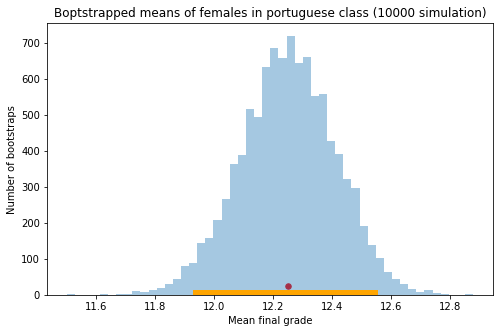

In [270]:
# Set the size of the plot
plt.figure(figsize=(8, 5))

# Visualize the results
ax = sns.distplot(bootstrap_means, kde=False);
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=10)  # Show line of values between 2.5 and 97.5 percentiles
sample_mean = female_portuguese_grades.mean()  # Get the mean of the sample
plt.scatter(x=sample_mean, y=25, marker='o', s=30, color='red')  # Draw the mean of the sample

# Set the title and the axes lables
ax.set(title=f'Boptstrapped means of females in portuguese class ({num_replications} simulation)',
       xlabel='Mean final grade', ylabel='Number of bootstraps')

# Clear the output and show the plot
plt.show()

### Question 5
Using bootstrap method to compute a confidence interval for the maximum value of a variable is problematic because<br>
the bootstrap method relies on a smaller sample than the real sample space, the smaller sample may not contain the maximum value of the real sample and because we use the data from the smaller sample in bootstrap we will never calculate a maximum value that is bigger than the maximum of the smaller sample, thus we will not be able to estimate the maximum value of the real sample space.

### Question 6

**a)**<br>
Based on the first graph, it seems that there is a discrimination against the hispanic population because they are given less disabillity expenditure than white people who were not hispanic,
but when we divide the given expenditure by age groups we see a different picture,
on the second graph we can see that there is no discrimination and there are even age groups where the hispanic population are given more expenditure than white people.<br>
this phenomenon is called the simpson paradox and it can be the result of not considering an important variable when studying a relationship.<br>
the difference in the first graph can be caused by a factor such as the population number for each age group, <br>
maybe in this case there were more white people who were adults, and thats why overall it seems that they were given more expenditure.<br>

In conclusion, we think that there is no discrimination against the hispanic population.